# WIP

### Read your HDF5 file! and Explore its contents..

Use [goofys](https://github.com/kahing/goofys) to mount the remote S3 directory onto your local folder. Then you can run this script which will test the speed of the S3 connection.

In [1]:
import os
import numpy as np
import pandas as pd
from ipywidgets import interact
import h5py # Read the Docs: http://docs.h5py.org/en/latest/index.html
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#if AWS S3
s3bucket_path = '/home/tony/Documents/s3bucket/'
path_to_hdf5 = s3bucket_path + 'LUNA16/hdf5-files/32dim_patches.hdf5'
hdf5_file = h5py.File(path_to_hdf5, 'r') # open in read-only mode

In [55]:
#if local:
hdf5_file_filename = '64dim_patches.hdf5'
path_to_hdf5 = '/Users/keil/datasets/LUNA16/' + hdf5_file_filename
hdf5_file = h5py.File(path_to_hdf5, 'r') # open in read-only mode

In [56]:
print("Valid hdf5 file in 'read' mode: " + str(hdf5_file))
file_size = os.path.getsize(path_to_hdf5)
print('Size of hdf5 file: {:.3f} GB'.format(file_size/2.0**30))

Valid hdf5 file in 'read' mode: <HDF5 file "64dim_patches.hdf5" (mode r)>
Size of hdf5 file: 1.528 GB


In [57]:
print('Dataset info and some real data:')
for name in [key for key in hdf5_file.keys()]:
    print(name)
    print(hdf5_file[name]) #name + shape + dtype of the dataset (refer back to extract_patch.py)
    print(hdf5_file[name][0:5]) #get the first 5 rows of the dataset

Dataset info and some real data:
centroid
<HDF5 dataset "centroid": shape (1560, 3), type "<f8">
[[  67.94        264.36       -816.07      ]
 [  66.15469547  238.205652   -720.5669567 ]
 [  98.57        133.875      -790.67      ]
 [ 111.3564346   166.8786954  -797.322464  ]
 [ -41.1571876   235.0321874  -767.2096876 ]]
inputs
<HDF5 dataset "inputs": shape (1560, 262144), type "<f4">
[[   71.    70.    61. ...,    40.    31.    27.]
 [ -754.  -773.  -861. ...,    34.     3.     4.]
 [   37.    31.    39. ...,   -38.   -19.    -3.]
 [  -46.   -20.    -9. ...,    40.    46.    58.]
 [ -996. -1001.  -988. ...,   172.   232.   261.]]
outputs
<HDF5 dataset "outputs": shape (1560, 1), type "<i8">
[[0]
 [0]
 [0]
 [0]
 [0]]
subsets
<HDF5 dataset "subsets": shape (1560, 1), type "<i8">
[[201]
 [201]
 [201]
 [201]
 [201]]
uuid
<HDF5 dataset "uuid": shape (1560, 1), type "|O">
[[b'1.3.6.1.4.1.14519.5.2.1.6279.6001.199220738144407033276946096708']
 [b'1.3.6.1.4.1.14519.5.2.1.6279.6001.19922073814

### What about ML? We need to Shuffle our dataset and prepare it for Keras. Alternatively for smaller datasets we can just pull all the data out and into numpy/pandas and use sklearn as usual. 

In [64]:
a = hdf5_file["inputs"]
a[1:10,:]

array([[-754., -773., -861., ...,   34.,    3.,    4.],
       [  37.,   31.,   39., ...,  -38.,  -19.,   -3.],
       [ -46.,  -20.,   -9., ...,   40.,   46.,   58.],
       ..., 
       [-999., -997., -992., ...,   25.,   20.,   58.],
       [  77.,   60.,   39., ...,   62.,   58.,   40.],
       [ 165.,  136.,  111., ...,  -50.,  -50.,  -71.]], dtype=float32)

In [65]:
patches = hdf5_file["inputs"][0]
patches

array([ 71.,  70.,  61., ...,  40.,  31.,  27.], dtype=float32)

In [24]:
def test_loop():

    idx = np.random.randint(50)
    imgs = hdf5_file["patches"][idx:(idx+40), :]
    return imgs
    
%timeit -r 30 imgs = test_loop()  # 30 repetitions of the runs

4.02 ms ± 109 µs per loop (mean ± std. dev. of 30 runs, 100 loops each)


In [28]:
32*32*32

32768

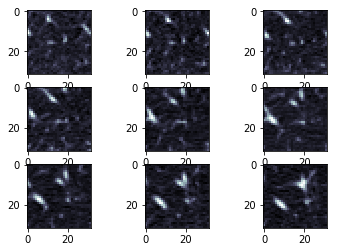

In [33]:
imgs = test_loop()
tensor = imgs[0,:].reshape(32,32,32)


for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(tensor[i,:,:], cmap='bone')


In [ ]:
# keras.utils.HDF5Matrix(datapath, dataset, start=0, end=None, normalizer=None) #https://keras.io/utils/#hdf5matrix

# with h5py.File('input/file.hdf5', 'r') as f:
#     x_data = f['x_data']
#     model.predict(x_data)

In [ ]:
# You can use the fit_generator method of your keras model. Just write your own generator class/function that pulls random batches of samples from your HDF5 file. That way, you never have to have all the data in memory at once. Similarly, if your validation data are too large to fit in memory, the validation_data argument to fit_generator also accepts a generator that produces batches from your validation data.

# Essentially, you just need to do an np.random.shuffle on an array of indices into your data set, then split the random index array into training, validation, and testing array indices. Your generator arguments to fit_generator will just pull batches from your HDF5 file according to sequential batches of indices in the training and validation index arrays.